#### Nama  : Muhammad Ridho Pratama

#### NIM   : 1306620013

#### Kelas : Fisika A

##### 1 Lakukan Transformasi FFT

In [2]:
import numpy as np
def geom(type, data, xp, yp, r, p, l, val, state):
    data2 = data.copy()
    newdata = []
    Xf = 0
    Xi = 0
    if state == 'low' or state == 'LOW':
        if type == 'kotak' or type == 'persegi' or type == 'cube':
            for j in range(len(data2)):
                if j < (yp-l) or j > (yp+l):
                    newdata.append(data2[j])
                if j >= (yp-l) and j<=(yp+l):
                    Xi, Xf = xp-p, xp+p
                    if Xi < 0:
                        data2[j][0:(Xf+1)] = 0
                        newdata.append(data2[j])
                    if Xi >= 0 and Xf<=(len(data2[0])-1):
                        data2[j][Xi:(Xf+1)] = 0
                        newdata.append(data2[j])
                    if Xf > (len(data2[0])-1):
                        data2[j][Xi:len(data2[0])-1] = 0
                        newdata.append(data2[j])
                    
        if type == 'lingkaran' or type == 'circle':
            for j in range (len(data2)):
                if j < (yp-r) or j > (yp+r):
                    newdata.append(data2[j])
                if j >= (yp-r) and j<=(yp+r):
                    Xf = round(np.sqrt(r**2 - (j-yp)**2) + xp)
                    Xi = 2*xp - Xf
                    if Xi < 0:
                        data2[j][0:(Xf+1)] = 0
                        newdata.append(data2[j])
                    if Xi >= 0 and Xf<=(len(data2[0])-1):
                        data2[j][Xi:(Xf+1)] = 0
                        newdata.append(data2[j])
                    if Xf > (len(data[0])-1):
                        data2[j][Xi:len(data2[0])-1] = 0
                        newdata.append(data2[j])

    if state == 'high' or state == 'HIGH':
        if type == 'kotak' or type == 'persegi' or type == 'cube':
            for j in range(len(data2)):
                if j < (yp-l) or j > (yp+l):
                    data2[j] = 0
                    newdata.append(data2[j])
                if j >= (yp-l) and j<=(yp+l):
                    Xi, Xf = xp-p, xp+p
                    if Xi < 0:
                        data2[j][(Xf+1):len(data2[0])-1] = 0
                        newdata.append(data2[j])
                    if Xi >= 0 and Xf<=(len(data2[0])-1):
                        data2[j][0:Xi] = 0
                        data2[j][(Xf+1):len(data2[j])-1] = 0
                        newdata.append(data2[j])
                    if Xf > (len(data2[0])-1):
                        data2[j][0:Xi] = 0
                        newdata.append(data2[j])
                    
        if type == 'lingkaran' or type == 'circle':
            for j in range (len(data2)):
                if j < (yp-r) or j > (yp+r):
                    data2[j] = 0
                    newdata.append(data2[j])
                if j >= (yp-r) and j<=(yp+r):
                    Xf = round(np.sqrt(r**2 - (j-yp)**2) + xp)
                    Xi = 2*xp - Xf
                    if Xi < 0:
                        data2[j][0:(Xf+1)] = 0
                        newdata.append(data2[j])
                    if Xi >= 0 and Xf<=(len(data2[0])-1):
                        data2[j][0:Xi] = 0
                        data2[j][(Xf+1):len(data2[j])-1] = 0
                        newdata.append(data2[j])
                    if Xf > (len(data[0])-1):
                        data2[j][0:Xi] = 0
                        newdata.append(data2[j])
    return newdata
                

In [3]:
import numpy.fft as fp
import matplotlib.pylab as pylab 
import numpy as np
from skimage.color import rgb2gray
from skimage import color
from skimage.io import imread
from scipy import fftpack

im1 = rgb2gray(imread('../TUGAS 5/elephant.png'))
freq = fp.fft2(im1)

C:\Users\Muhammad Ridho P\AppData\Local\Temp\ipykernel_34592\321577285.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im1 = rgb2gray(imread('../TUGAS 5/elephant.png'))


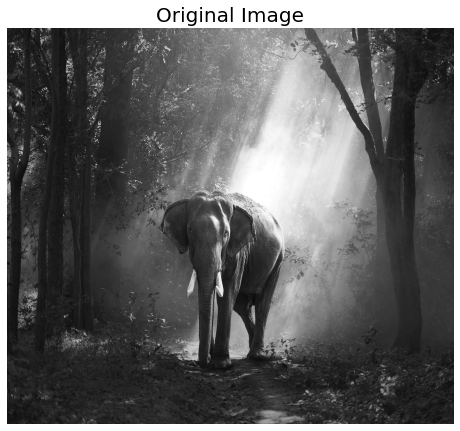

In [4]:
pylab.figure(figsize=(8, 8))
pylab.imshow(im1, cmap='gray')
pylab.title('Original Image', size=20); pylab.axis('off'); pylab.show()

##### 3 Plot FFT Spectrum dan Phase Spectrum

In [5]:
FFT_freq = freq.copy()
FFT_freq = fp.fftshift(FFT_freq)
#FFT_freq[426, 480] = 0
Phase_freq = np.angle(FFT_freq)
print(FFT_freq.shape)


(852, 960)


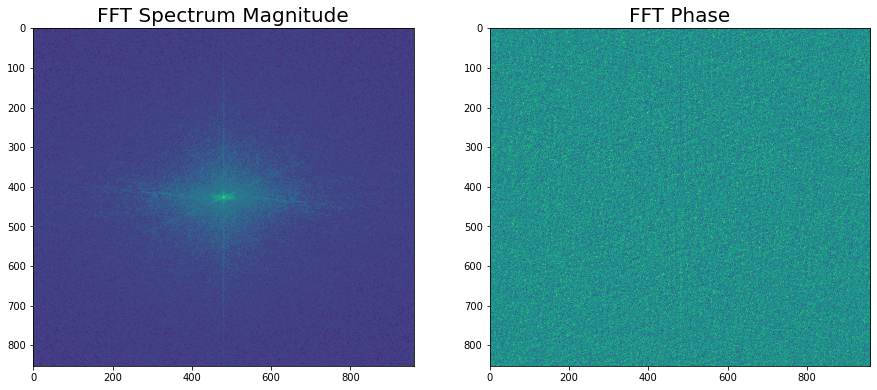

In [6]:
pylab.figure(figsize=(15,15))
pylab.subplot(1,2,1), pylab.imshow(20*np.log10( 0.01 +np.abs(FFT_freq)).astype(int))
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(1,2,2), pylab.imshow(Phase_freq.astype(int))
pylab.title('FFT Phase', size=20)
pylab.show()


##### 4. Transformasi balik FFT

In [7]:
im1_invers = fp.ifft2(freq).real

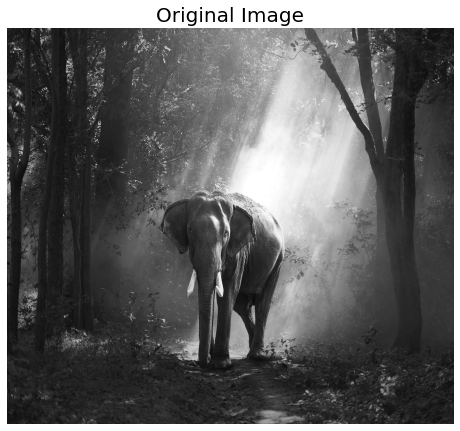

In [8]:
pylab.figure(figsize=(8, 8))
pylab.imshow((im1_invers), cmap = 'gray')
pylab.title('Original Image', size=20); pylab.axis('off'); pylab.show()

##### 5. Buat Threshold divariasikan, kemudian di transformasi balik

In [9]:
from ipywidgets import interact

# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.

#@interact(status = [('LOW'), ('HIGH')])
@interact(radius=(0, 300))

def spectrum(radius):
    freq1 = freq.copy()
    (w, h) = freq.shape
    half_w, half_h = int(w/2), int(h/2)
    freq2 = fp.fftshift(freq1)
    freq3 = geom('circle', freq2, 426+50, 480-50, radius, 100, 100, 1, 'high')
    freq3 = np.array(freq3)
    im_2 = fp.ifft2(fftpack.ifftshift(freq3)).real
    pylab.figure(figsize=(15, 15))
    pylab.subplot(1,2,1); pylab.imshow((20*np.log10( 0.1 + freq3)).astype(int))
    pylab.subplot(1,2,2); pylab.imshow((im_2), cmap = 'gray')
    pylab.show()

interactive(children=(IntSlider(value=150, description='radius', max=300), Output()), _dom_classes=('widget-in…

https://www.dev2qa.com/how-to-add-interactive-widget-slide-bar-in-jupyter-notebook/